# Breast Cancer Classification Algorithms

In [12]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [13]:
# Load Data
data = pd.read_csv('../data/data.csv')
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

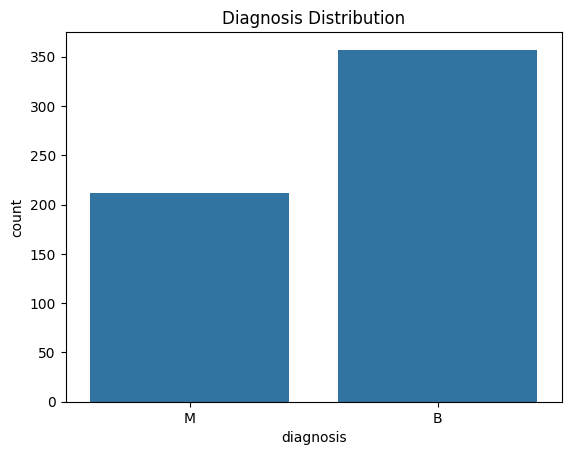

In [14]:
# Data Exploration
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Distribution')
plt.savefig('../visuals/diagnosis_distribution.png')
plt.show()

In [15]:
# Train-Test Split
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)

KNN Accuracy: 0.9590643274853801


In [24]:
# Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9824561403508771


In [25]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
acc_dtree = accuracy_score(y_test, y_pred_dtree)
print("Decision Tree Accuracy:", acc_dtree)

Decision Tree Accuracy: 0.9415204678362573


In [26]:
# Random Forest
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)
y_pred_rforest = rforest.predict(X_test)
acc_rforest = accuracy_score(y_test, y_pred_rforest)
print("Random Forest Accuracy:", acc_rforest)

Random Forest Accuracy: 0.9707602339181286


In [27]:
# Results Comparison
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [acc_knn, acc_logreg, acc_dtree, acc_rforest]
})
print(results)

                 Model  Accuracy
0                  KNN  0.959064
1  Logistic Regression  0.964912
2        Decision Tree  0.941520
3        Random Forest  0.970760


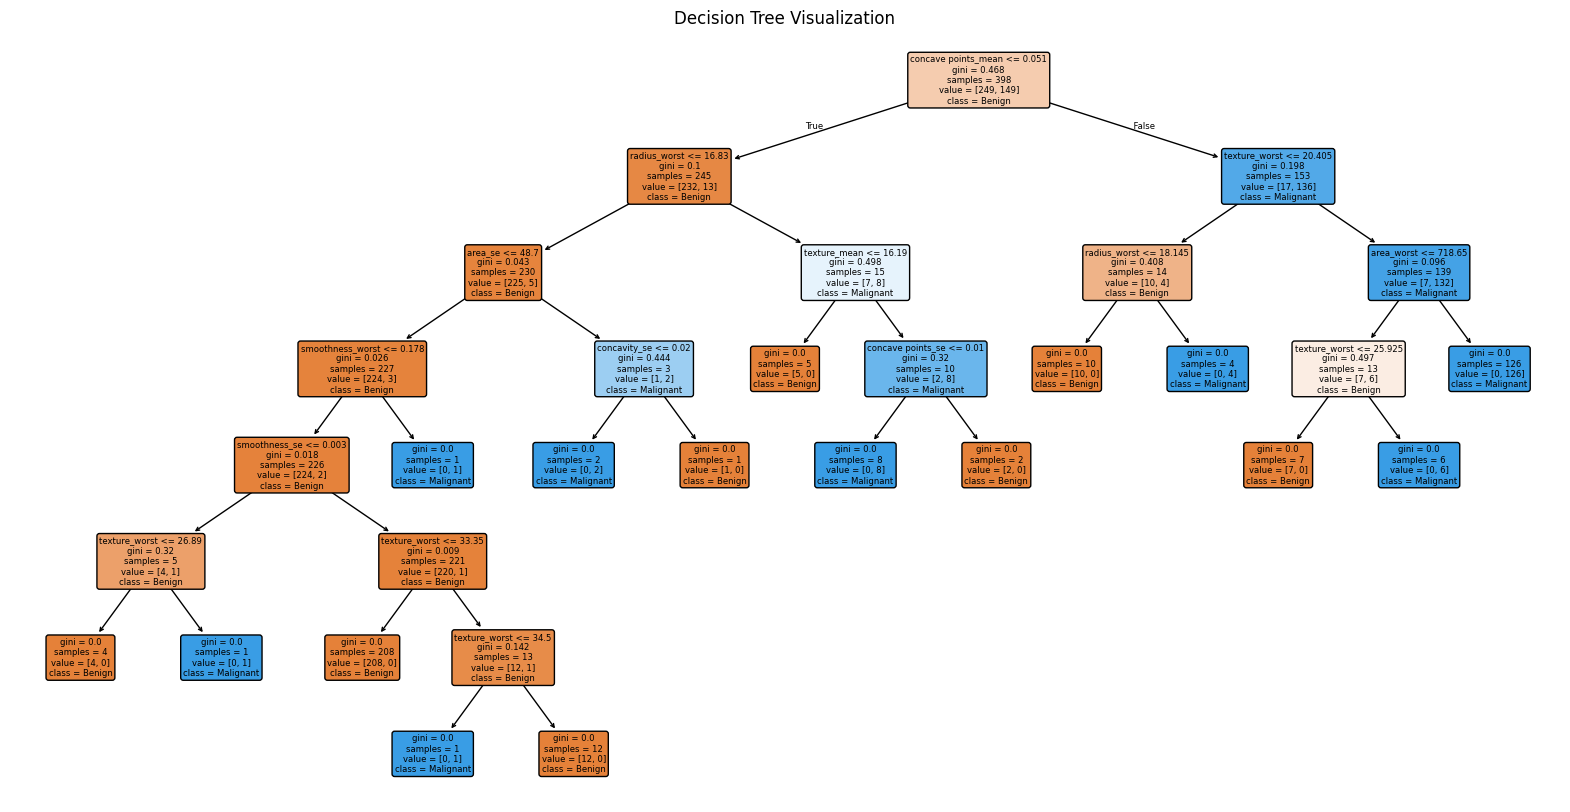

In [28]:
# Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignant'], rounded=True)
plt.title("Decision Tree Visualization")
plt.savefig('../visuals/decision_tree.png')
plt.show()


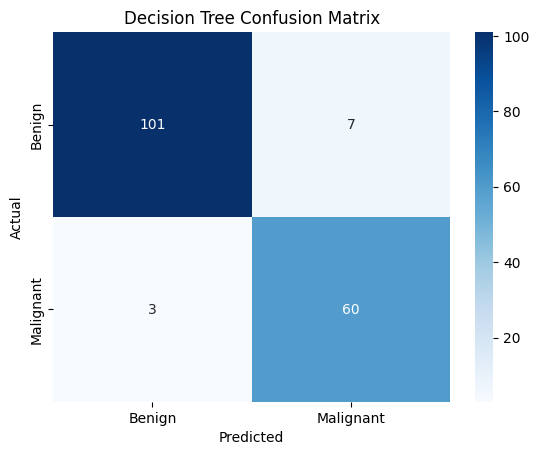

In [22]:
# Confusion Matrix (Decision Tree)
cm = confusion_matrix(y_test, y_pred_dtree)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('../visuals/confusion_matrix.png')
plt.show()
